In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
excursion.

SyntaxError: invalid syntax (<ipython-input-2-2f93fa656aa9>, line 1)

In [3]:
import os

import excursion
import excursion.testcases.fast as scandetails
import excursion.optimize
import numpy as np
import datetime

import excursion.plotting.twodim as plots
import excursion.utils as utils

np.warnings.filterwarnings('ignore')


/Users/lukas/Code/excursion/venv/lib/python3.6/site-packages/numpy/lib/index_tricks.py:199: ComplexWarning: Casting complex values to real discards the imaginary part
  nn[k] = (nn[k]*step+start)


/Users/lukas/Code/excursion/examples


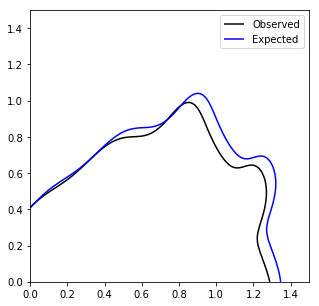

In [4]:

grid = ix,iy = scandetails.plotG
X = excursion.utils.mesh2points(grid,scandetails.plot_rangedef[:,2])

functions = [
    scandetails.truth,
    lambda X: scandetails.truth(X-0.05)
]


scandetails.truth_functions = functions


truthv = excursion.utils.values2mesh(
    scandetails.truth(X),
    scandetails.plot_rangedef,
    scandetails.invalid_region
)

contours = []
for truth_func in scandetails.truth_functions:
    contours.append(
        excursion.utils.values2mesh(
            truth_func(X),
            scandetails.plot_rangedef,
            scandetails.invalid_region
        )
    )


legend = []
for cont,c in zip(contours, ['k','b']):
    curve = plt.contour(ix,iy,cont, levels = [0], colors=[c])
    legend.append(curve.collections[0])
plt.gcf().set_size_inches(5,5)
plt.legend(legend, ['Observed','Expected'])
plt.savefig('truth.png', bbox_inches = 'tight')
!pwd

In [5]:
def plot_and_save(workdir, index, *args):
    fig, axarr = plt.subplots(1, 3, sharey=True)
    fig.set_size_inches(9.5, 3.5)
    plt.title('Iteration {}'.format(index))
    plots.plot(axarr,gps,X,y_list,scandetails)
    plt.tight_layout()
    plt.savefig(os.path.join(workdir,'update_{}.png'.format(str(index).zfill(3))), bbox_inches = 'tight')
    plt.show()

In [6]:
#initialize it...
N_INIT  = 5
N_FUNCS = 2

np.random.seed(1)
X = np.random.uniform(scandetails.plot_rangedef[:,0],scandetails.plot_rangedef[:,1], size = (N_INIT,2))
y_list = [np.array([scandetails.truth_functions[i](np.asarray([x]))[0] for x in X]) for i in range(N_FUNCS)]

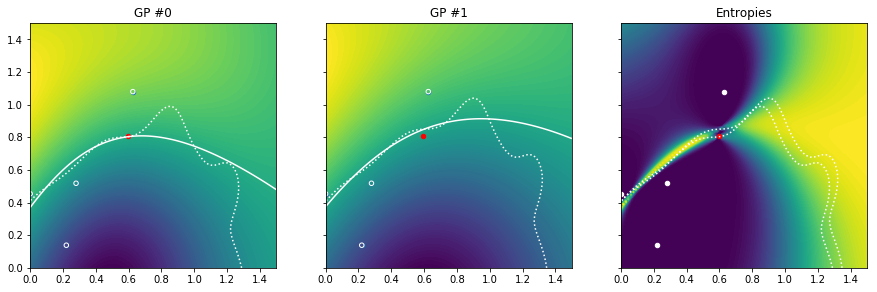

In [7]:
gps = [excursion.get_gp(X,y_list[i]) for i in range(N_FUNCS)]


In [ ]:
excursion.optimize.gridsearch(gps, X, scandetails)

In [ ]:
N_UPDATES = 50

workdir = datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S-2dmulti')
os.mkdir(workdir)
for index in range(N_UPDATES):
    gps = [excursion.get_gp(X,y_list[i]) for i in range(N_FUNCS)]

    plot_and_save(workdir, index, gps,X,y_list,scandetails)

    newx, acqvals = excursion.optimize.gridsearch(gps, X, scandetails)

    print('Iteration {}. new x: {}'.format(index, newx))
    newys_list = [scandetails.truth_functions[i](np.asarray([newx])) for i in range(N_FUNCS)]
    for i,newys in enumerate(newys_list):
        print('Iteration {}. Evaluted function {} to values: {}'.format(index, i,newys))
        y_list[i] = np.concatenate([y_list[i],newys])
    X = np.concatenate([X,np.array([newx])])

In [ ]:
excursion.optimize

In [ ]:
excursion

In [13]:
k = gps[0].kernel_

In [16]:
type(k),k

(sklearn.gaussian_process.kernels.Product,
 12.6**2 * RBF(length_scale=[0.57, 0.744]))

In [19]:
type(k.k1),type(k.k2)

(sklearn.gaussian_process.kernels.ConstantKernel,
 sklearn.gaussian_process.kernels.RBF)

In [38]:
rnd = scandetails.acqX[np.random.choice(np.arange(len(scandetails.acqX)), size = 500, replace = False)]

In [40]:
len(scandetails.acqX)

1681